In [70]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline

In [99]:
chunks = ['S'+str(i) for i in range(1,13)]
data = {}
clean_data = {}

for f in os.listdir('/home/katya/start/HIS3InterspeciesEpistasis/Data/'):
    if 'csv' in f:
        data[f[:-16]] = pd.DataFrame.from_csv('/home/katya/start/HIS3InterspeciesEpistasis/Data/' + f, sep = '\t')
        clean_data[f[:-16]] = data[f[:-16]][(data[f[:-16]].nonsense == 0) & (data[f[:-16]].middle == 1) & (data[f[:-16]].nat_lib == 1)]
        clean_data[f[:-16]] = clean_data[f[:-16]].sample(1000)

In [207]:
def getCoordinates(chunk, dist, radius, square):
    
    if len(clean_data[chunk].s[clean_data[chunk].dist_Scer==dist])!=0:
        step = (np.pi*2+1)/len(clean_data[chunk].s[clean_data[chunk].dist_Scer==dist])

        angle = np.arange(0, np.pi*2, step)
        r = radius
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        idx = np.random.permutation(angle.shape[0])
        x = x[idx]
        y = y[idx]
        angle = np.arctan2(x, y)
        order = np.argsort(angle)
        x = x[order]
        y = y[order]

        z = np.zeros_like(x)

        dx = square * np.ones_like(z)
        dy = dx.copy()
        dz = clean_data[chunk].s[clean_data[chunk].dist_Scer==dist].values

        return x, y, z, dx, dy, dz
    
    else:
        return 0,0,0,0,0,0

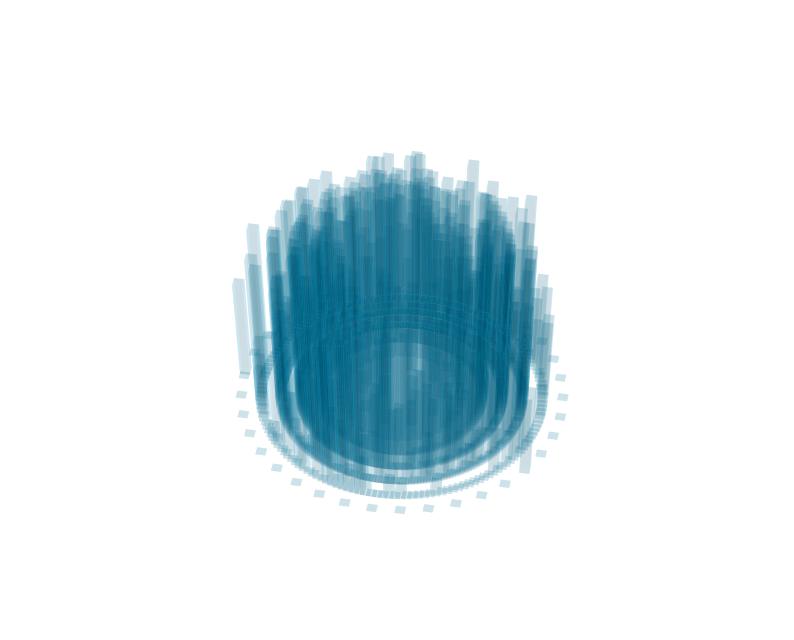

In [264]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(0, 0, 0, 0, 0, 0.45, color='#00AEE9', edgecolor='white', linewidth=0.1, alpha=.1, zsort='average')

for i in range(10):
    
    x, y, z, dx, dy, dz = getCoordinates('S11',i,2*i,1)
    ax.bar3d(x, y, z, dx, dy, dz, color='#00AEE9', edgecolor='white', linewidth=0.1, alpha=.1, zsort='average')
    
#     if i>2:
#         ax.plot(np.append(x, x[0]), np.append(y, y[0]),'-k', alpha=0.1)
    
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the ticks
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

ax.view_init(60, 100)

x = [1,2,3]  #x coordinates of each bar

y = [0,0,0]  #y coordinates of each bar

z = [0,0,0]  #z coordinates of each bar

dx = [0.5, 0.5, 0.5]  #width of each bar

dy = [0.5, 0.5, 0.5]  #depth of each bar

dz = [5, 4, 7]        #height of each bar